# Segmentação de Clientes com Técnicas de Aprendizado Não Supervisionado

Este estudo utiliza o conjunto de dados *E-commerce Sales Transactions Dataset* (Kaggle) para explorar o comportamento de compra de clientes e aplicar **técnicas de aprendizado não supervisionado**, com foco na **segmentação de clientes via algoritmo K-Means**.  

O dataset reúne milhares de registros de transações comerciais, contendo variáveis relacionadas ao perfil dos consumidores, características dos produtos e métricas de desempenho financeiro. As principais colunas incluem:  

- **Customer ID** (identificação do cliente)  
- **Gender** (gênero do comprador)  
- **Age** (idade do cliente)  
- **Category e Sub-category** (categoria e subcategoria de produtos)  
- **Region** (localização geográfica)  
- **Quantity, Unit Price, Discount e Profit** (informações financeiras da transação)  

---

## Objetivos

- Realizar **análise exploratória de dados (EDA)** para compreender padrões de consumo e desempenho de vendas por categoria, região e gênero.  
- Calcular indicadores como **margem de lucro média** e **volume de vendas** ao longo do tempo.  
- Aplicar o **algoritmo K-Means** para **segmentar os clientes** com base em atributos de compra e rentabilidade.  
- Avaliar a **quantidade ideal de clusters** utilizando métricas como *inertia* e *silhouette score*.  
- Interpretar e visualizar os clusters gerados, buscando **insights sobre perfis de clientes e oportunidades de marketing**.  

---

## Metodologia

- **Pré-processamento dos dados:**  
  - Tratamento de valores ausentes e duplicados;  
  - Conversão de datas e criação de variáveis derivadas (ex.: lucro percentual e volume total de compra);  
  - Codificação de variáveis categóricas e normalização dos atributos numéricos com *StandardScaler*.  

- **Análise Exploratória (EDA):**  
  - Distribuições de lucro, desconto e volume de vendas;  
  - Comparação de desempenho entre categorias e regiões;  
  - Análise temporal das margens de lucro mensais.  

- **Modelagem com K-Means:**  
  - Determinação do número ótimo de clusters com base no **método do cotovelo (Elbow Method)** e no **índice de silhueta**;  
  - Aplicação do algoritmo **K-Means** para agrupar clientes segundo suas características financeiras e de compra;  
  - Utilização da **Análise de Componentes Principais (PCA)** para reduzir a dimensionalidade e permitir a **visualização dos clusters** em 2D.  

- **Interpretação dos Resultados:**  
  - Identificação de perfis distintos de clientes (ex.: alto lucro e baixa frequência, compradores de desconto, clientes premium etc.);  
  - Geração de gráficos de dispersão e mapas de calor para ilustrar os agrupamentos.  

---

## Importância do Estudo

A aplicação de técnicas de **aprendizado não supervisionado**, especialmente o **K-Means**, permite **segmentar clientes com base em padrões ocultos de comportamento**, sem a necessidade de rótulos pré-definidos.  

Essas análises fornecem suporte estratégico para áreas de **marketing, precificação e fidelização**, possibilitando:  
- o direcionamento de campanhas personalizadas,  
- o reconhecimento de segmentos mais lucrativos,  
- e a otimização de recursos comerciais.  

Assim, o estudo contribui para demonstrar o potencial do *machine learning* na **análise inteligente de dados de e-commerce**, transformando grandes volumes de informação em **insights acionáveis para tomada de decisão**.  


## E-commerce Sales Transactions Dataset

O conjunto de dados utilizado neste estudo refere-se a **transações de vendas realizadas em uma plataforma de comércio eletrônico**, abrangendo informações sobre pedidos, clientes, produtos e métricas financeiras. Ele contém registros individuais de cada venda, permitindo a análise de padrões de consumo, desempenho por categoria e comportamento dos clientes ao longo do tempo.  

Os dados são compostos por diversas variáveis que descrevem **as características das transações e dos consumidores**, possibilitando tanto análises exploratórias quanto modelagens preditivas e de segmentação. As principais colunas são descritas a seguir:

- **Order ID (Identificação do pedido):** código único que representa cada transação realizada na plataforma.  
- **Customer ID (Identificação do cliente):** identificador único que relaciona as compras a um mesmo cliente.  
- **Gender (Gênero):** indica o gênero do comprador (masculino, feminino ou outro).  
- **Age (Idade):** idade do cliente no momento da compra, em anos.  
- **Category (Categoria):** categoria de produto adquirida (ex.: Eletrônicos, Moda, Esportes, Casa, etc.).  
- **Sub-category (Subcategoria):** tipo específico de produto dentro da categoria (ex.: smartphones, notebooks, vestuário, etc.).  
- **Region (Região):** localização geográfica do cliente ou área de entrega.  
- **Order Date (Data do pedido):** data em que a transação foi realizada.  
- **Quantity (Quantidade):** número de unidades compradas em cada pedido.  
- **Unit Cost (Custo unitário):** custo de aquisição de cada item para o varejista.  
- **Unit Price (Preço unitário):** valor de venda de cada unidade ao consumidor.  
- **Discount (Desconto):** percentual ou valor de desconto aplicado à compra.  
- **Profit (Lucro):** diferença entre o preço de venda e o custo, considerando eventuais descontos.  

Fonte: [https://www.kaggle.com/datasets/miadul/e-commerce-sales-transactions-dataset](https://www.kaggle.com/datasets/miadul/e-commerce-sales-transactions-dataset)  

Este conjunto de dados permite a condução de **análises exploratórias e preditivas** voltadas à compreensão do desempenho comercial e do comportamento do consumidor. As aplicações incluem o **monitoramento de margens de lucro**, **identificação de padrões de compra por segmento de cliente**, **avaliação da eficácia de descontos e promoções**, bem como a **segmentação de clientes** com base em métricas de valor e frequência de compra.


In [2]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Carregando dados
df = pd.read_csv('/content/ecommerce_sales_34500.csv')
display(df.head())

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male


# Limpeza e Pré-processamento de Dados

In [4]:
# Verificar valores ausentes, tipos de dados e estatísticas básicas
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

None

,price,discount,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age
count,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000,34500.000000
mean,119.391632,0.049291,1.490725,4.814203,170.008494,6.152120,28.116505,43.474377
std,195.620477,0.069894,0.932270,1.242141,357.503014,2.389539,53.352947,14.980682
min,1.010000,0.000000,1.000000,3.000000,0.820000,0.000000,-6.200000,18.000000
25%,16.690000,0.000000,1.000000,4.000000,19.710000,4.420000,1.500000,31.000000
50%,45.660000,0.000000,1.000000,5.000000,56.820000,6.090000,10.550000,43.000000
75%,130.950000,0.100000,2.000000,6.000000,168.530000,7.830000,33.132500,56.000000
max,2930.470000,0.300000,5.000000,13.000000,12931.800000,15.650000,1536.170000,69.000000


In [5]:
# Garantir que os nomes das colunas sejam consistentes (tudo em minúsculo e sem espaços/caracteres especiais).
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
print('Colunas após a limpeza:')
print(df.columns)
print('\n')

# Converter colunas para tipos de dados apropriados.
# Converter a coluna 'order_date' em objetos datetime para permitir análises temporais.
df['order_date'] = pd.to_datetime(df['order_date'])
print('Tipos de dados após a conversão:')
print(df.dtypes)
print('\n')

# Identificar e remover linhas duplicadas para garantir a integridade dos dados.
print('Quantidade de linhas antes de remover duplicadas:', len(df))
print('Quantidade de linhas duplicadas encontradas:', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Quantidade de linhas após remover duplicadas:', len(df))

Colunas após a limpeza:
Index(['order_id', 'customer_id', 'product_id', 'category', 'price',
       'discount', 'quantity', 'payment_method', 'order_date',
       'delivery_time_days', 'region', 'returned', 'total_amount',
       'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender'],
      dtype='object')


Tipos de dados após a conversão:
order_id                      object
customer_id                   object
product_id                    object
category                      object
price                        float64
discount                     float64
quantity                       int64
payment_method                object
order_date            datetime64[ns]
delivery_time_days             int64
region                        object
returned                      object
total_amount                 float64
shipping_cost                float64
profit_margin                float64
customer_age                   int64
customer_gender               object
dtype: object


# Análise Exploratória de Dados (EDA)

In [6]:
# Configurações de estilo para os gráficos.
# Utiliza o tema 'whitegrid' do seaborn e uma paleta de cores suaves ('Set2') para uma apresentação moderna e agradável.
sns.set_theme(style="whitegrid", context="talk")
soft_palette = sns.color_palette("Set2")
sns.set_palette(soft_palette)

In [7]:
# Função auxiliar para plotar gráficos de barras com rótulos no topo.
# Facilita a visualização dos valores exatos em cada barra do gráfico.
def plot_bar_with_labels(data, title, xlabel, ylabel, figsize=(12,6), rotation=45):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=data.index, y=data.values, edgecolor='white', linewidth=1.5)
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.xticks(rotation=rotation, ha='right')

    # Adiciona anotações (rótulos de valor) no topo de cada barra.
    for i, v in enumerate(data.values):
        # Formata o texto com o valor da barra, posicionado acima dela.
        ax.text(i, v + (v*0.01), f"{v:,.0f}", ha='center', va='bottom', fontsize=10, color='dimgray')
    sns.despine(left=True, bottom=True) # Remove as bordas desnecessárias do gráfico
    plt.tight_layout()
    plt.show()

Este notebook realiza uma análise completa de dados de e-commerce, desde a limpeza e pré-processamento até a análise exploratória (EDA) e modelagem preditiva.

A **Limpeza e Pré-processamento de Dados** foca em preparar os dados para análise, garantindo a consistência, tratando tipos de dados e removendo duplicatas.

# Análise Exploratória de Dados (EDA)

Esta seção se dedica a explorar os dados e identificar padrões, tendências e insights através de visualizações e estatísticas descritivas. O objetivo é entender melhor o comportamento de vendas, clientes, produtos e regiões.

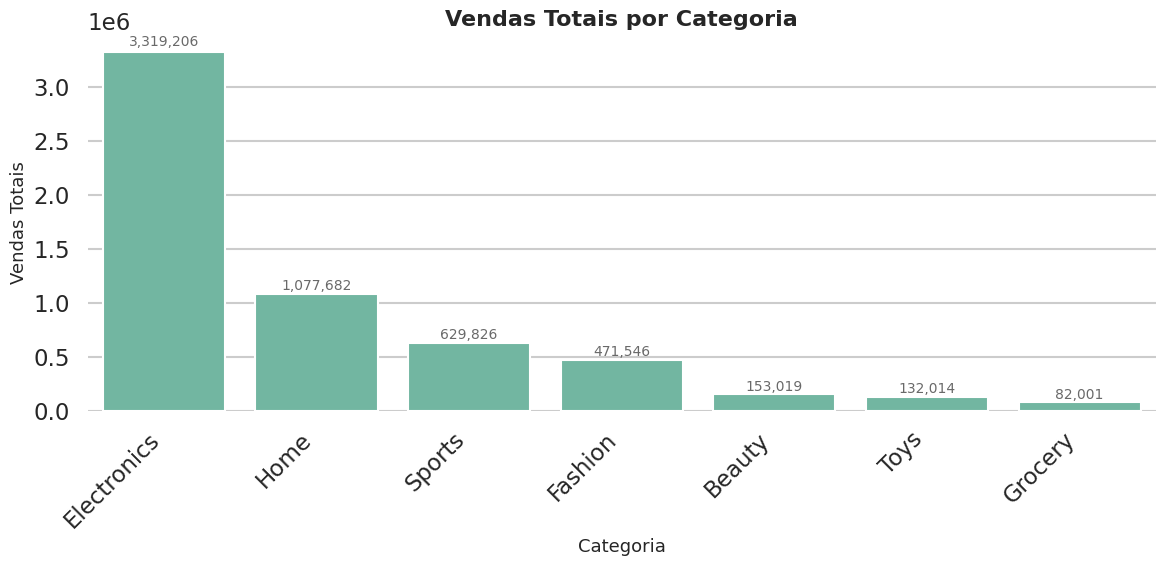

In [8]:
# 1. Análise de Vendas por Categoria de Produto.
# Agrupa os dados pela coluna 'category' e soma o 'total_amount' para cada categoria.
sales_by_category = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
plot_bar_with_labels(sales_by_category, 'Vendas Totais por Categoria', 'Categoria', 'Vendas Totais')

Electronics domina com folga (≈3.3M), seguido por Home (~1.08M) e Sports (~630k). Grocery é bem pequeno (~82k).
Interpretação/ação

Priorizar inventário e campanhas para Electronics (alto volume) e Home (bom segundo lugar).

Avaliar se Grocery tem baixa penetração por preço, logística ou mix de SKUs; possível oportunidade de crescimento ou decisão de desinvestir.

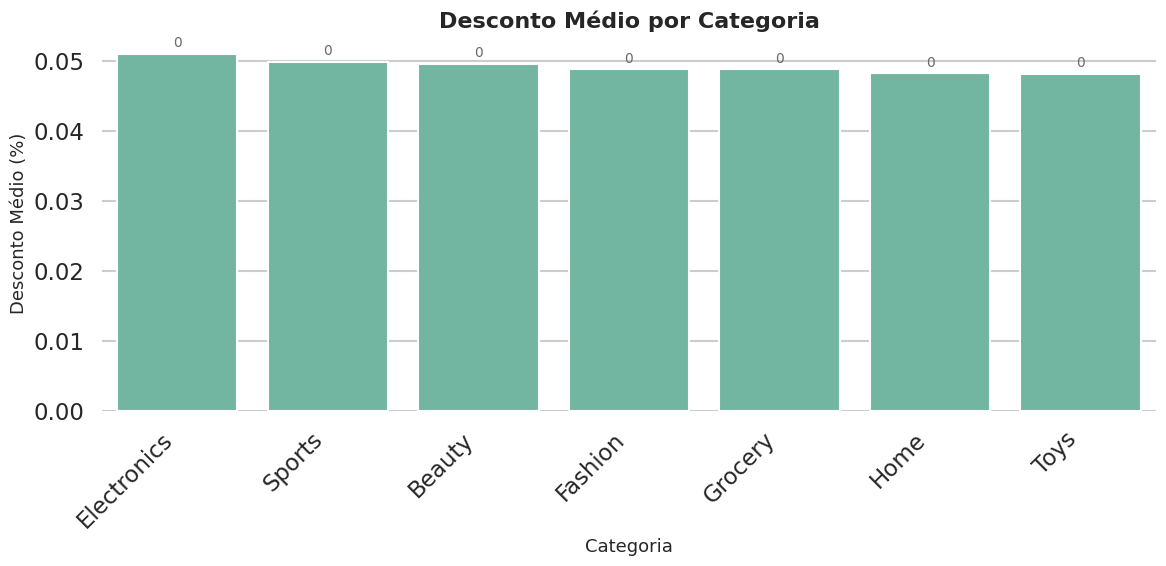

In [9]:
# 2. Desconto por Categoria.
# Agrupa os dados pela coluna 'category' e calcula a média do 'discount' para cada categoria.
discount_by_category = df.groupby('category')['discount'].mean().sort_values(ascending=False)
plot_bar_with_labels(discount_by_category, 'Desconto Médio por Categoria', 'Categoria', 'Desconto Médio (%)')

Diferença de desconto médio entre categorias é pequena (todas em torno de ~4.8–5.0%).

Apesar de Electronics ter alta receita, não recebe descontos muito diferentes da média — isto pode explicar margens favoráveis.
Interpretação/ação

Se objetivo for margem, manter descontos modestos em Electronics; se quiser crescer volume, testar promoções segmentadas em Home/Sports com A/B testing.

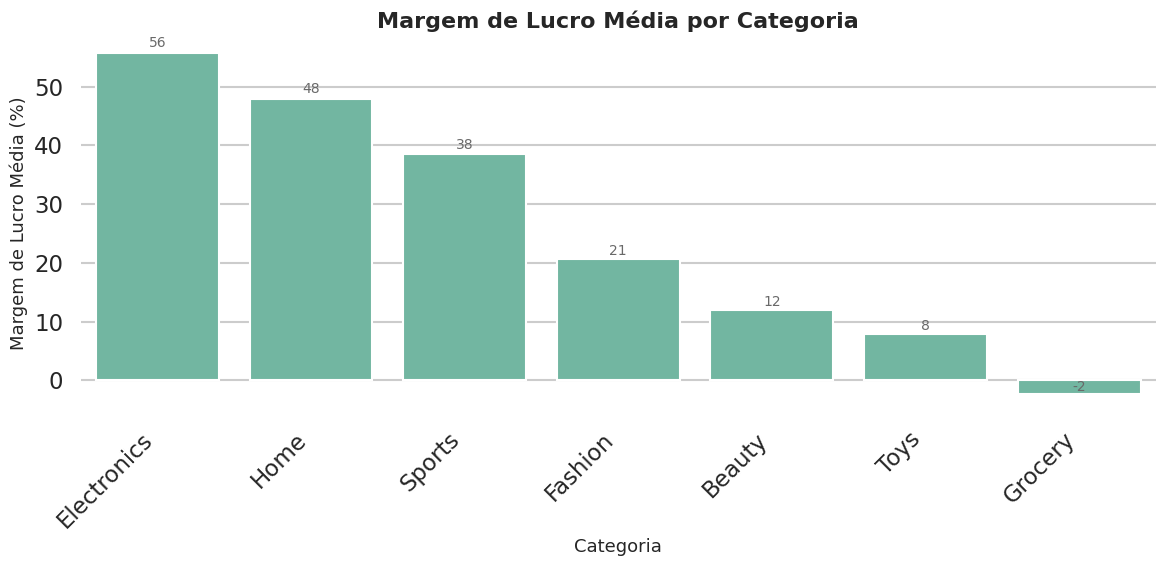

In [10]:
# 3. Margem de Lucro por Categoria.
# Agrupa os dados pela coluna 'category' e calcula a média da 'profit_margin' para cada categoria.
profit_margin_by_category = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
plot_bar_with_labels(profit_margin_by_category, 'Margem de Lucro Média por Categoria', 'Categoria', 'Margem de Lucro Média (%)')

Electronics e Home apresentam margens muito altas (56% e 48%); Grocery aparece com margem negativa (~-2%).
Interpretação/ação

Grocery com margem negativa: revisão urgente de pricing, custo ou fraude/erro de dados.

Produtos com alta margem (Electronics, Home) são alavancas potenciais para promoções rentáveis.

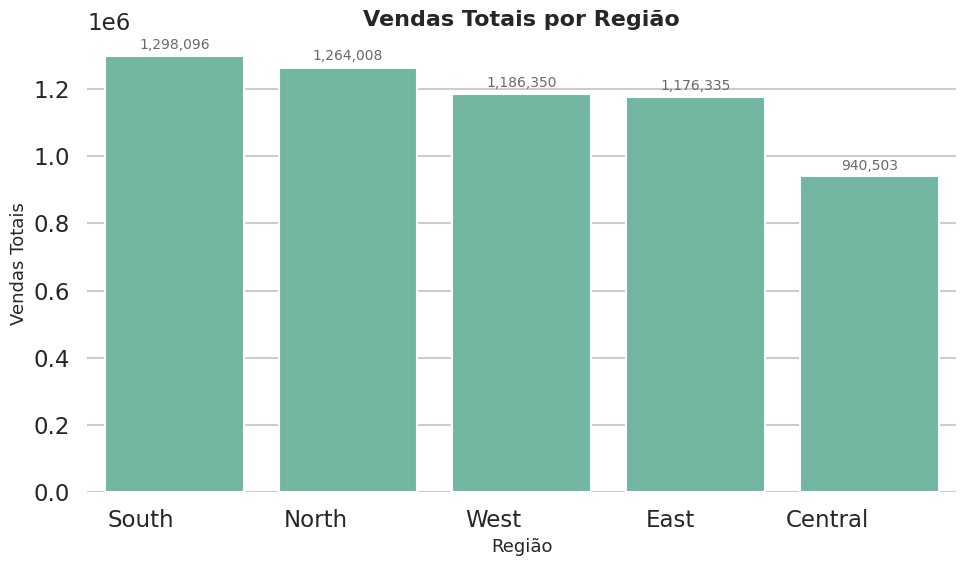

In [11]:
# 4. Vendas por Região.
# Agrupa os dados pela coluna 'region' e soma o 'total_amount' para cada região.
sales_by_region = df.groupby('region')['total_amount'].sum().sort_values(ascending=False)
plot_bar_with_labels(sales_by_region, 'Vendas Totais por Região', 'Região', 'Vendas Totais', figsize=(10,6), rotation=0)

South e North lideram (≈1.26–1.30M), Central claramente menor (~940k).
Interpretação/ação

Investir em expansão/marketing na Central para reduzir gap; analisar logística/entrega/awareness local.

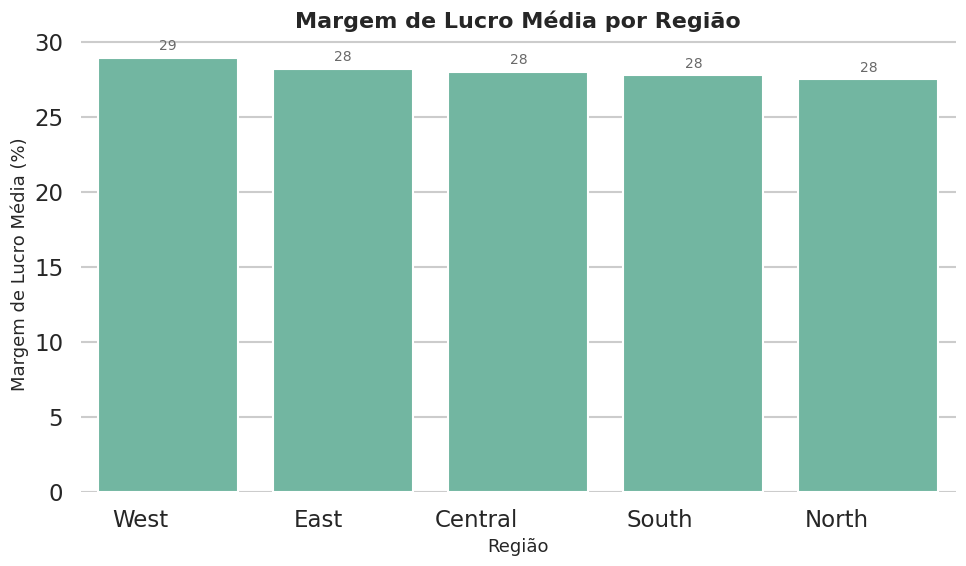

In [12]:
# 5. Margem de Lucro por Região.
# Agrupa os dados pela coluna 'region' e calcula a média da 'profit_margin' para cada região.
profit_margin_by_region = df.groupby('region')['profit_margin'].mean().sort_values(ascending=False)
plot_bar_with_labels(profit_margin_by_region, 'Margem de Lucro Média por Região', 'Região', 'Margem de Lucro Média (%)', figsize=(10,6), rotation=0)

Margem média homogênea (~28–29%) entre regiões — indica consistência de pricing/custos regionais.
Interpretação/ação

Como margens são estáveis, focar em aumentar volume onde vendas estão mais baixas (Central).

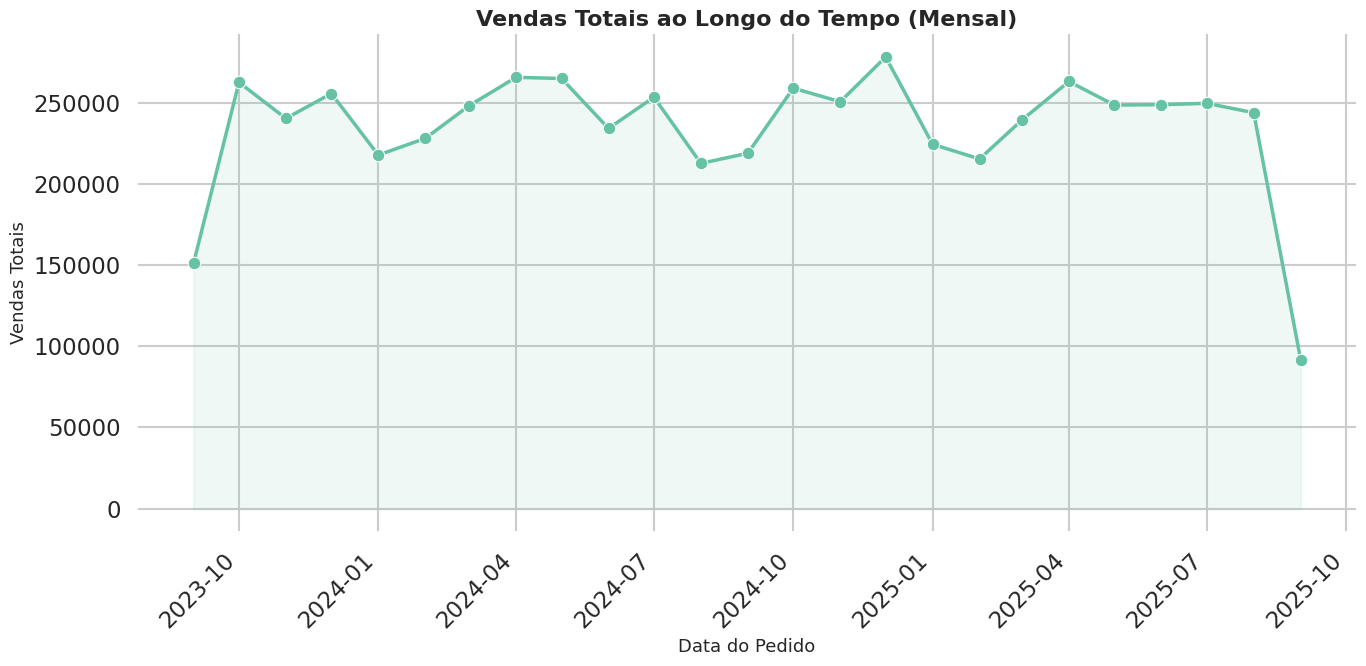

In [13]:
# 6. Análise de Séries Temporais (Vendas, Desconto, Lucro).
df['order_month'] = df['order_date'].dt.to_period('M')
sales_over_time = df.groupby('order_month')['total_amount'].sum().to_timestamp()
discount_over_time = df.groupby('order_month')['discount'].mean().to_timestamp()
profit_margin_over_time = df.groupby('order_month')['profit_margin'].mean().to_timestamp()

# Define uma função auxiliar para plotar gráficos de linha para séries temporais.
def plot_line_smooth(series, title, ylabel, color_idx=0):
    plt.figure(figsize=(14,7))

    sns.lineplot(x=series.index, y=series.values, color=soft_palette[color_idx], marker='o', linewidth=2.5)
    # Adiciona uma área sombreada abaixo da linha para destacar a tendência.
    plt.fill_between(series.index, series.values, alpha=0.1, color=soft_palette[color_idx])
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel('Data do Pedido', fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.xticks(rotation=45, ha='right')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

plot_line_smooth(sales_over_time, 'Vendas Totais ao Longo do Tempo (Mensal)', 'Vendas Totais', color_idx=0)

Vendas mensais relativamente estáveis entre ~200k–270k, com picos ocasionais e queda no último ponto (provavelmente mês incompleto/recente).
Interpretação/ação

Identificar meses de pico (promoções/temporalidade) e replicar estratégias; conferir se o último mês está truncado (dados parciais).

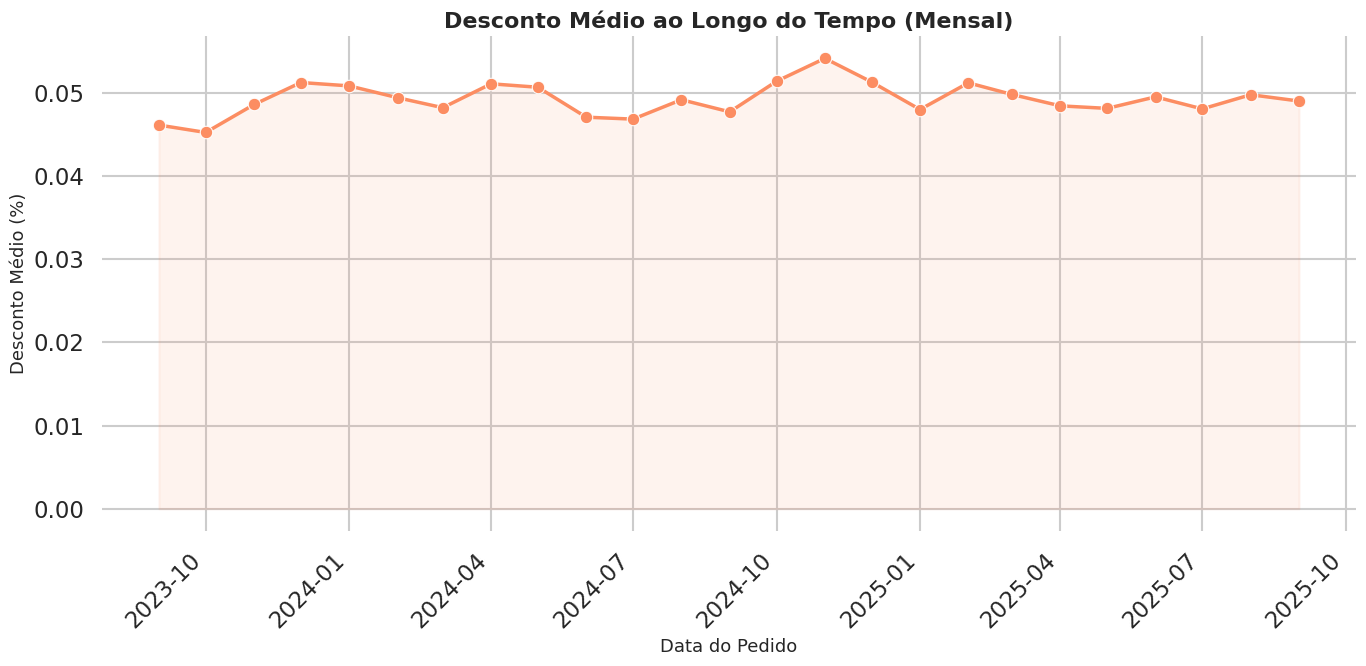

In [14]:
plot_line_smooth(discount_over_time, 'Desconto Médio ao Longo do Tempo (Mensal)', 'Desconto Médio (%)', color_idx=1)

Desconto médio está estável ~4.5–5.0% com leve pico em um mês (possível campanha).
Interpretação/ação

Correlacionar picos de desconto com picos de vendas e margens para verificar eficácia das promoções.

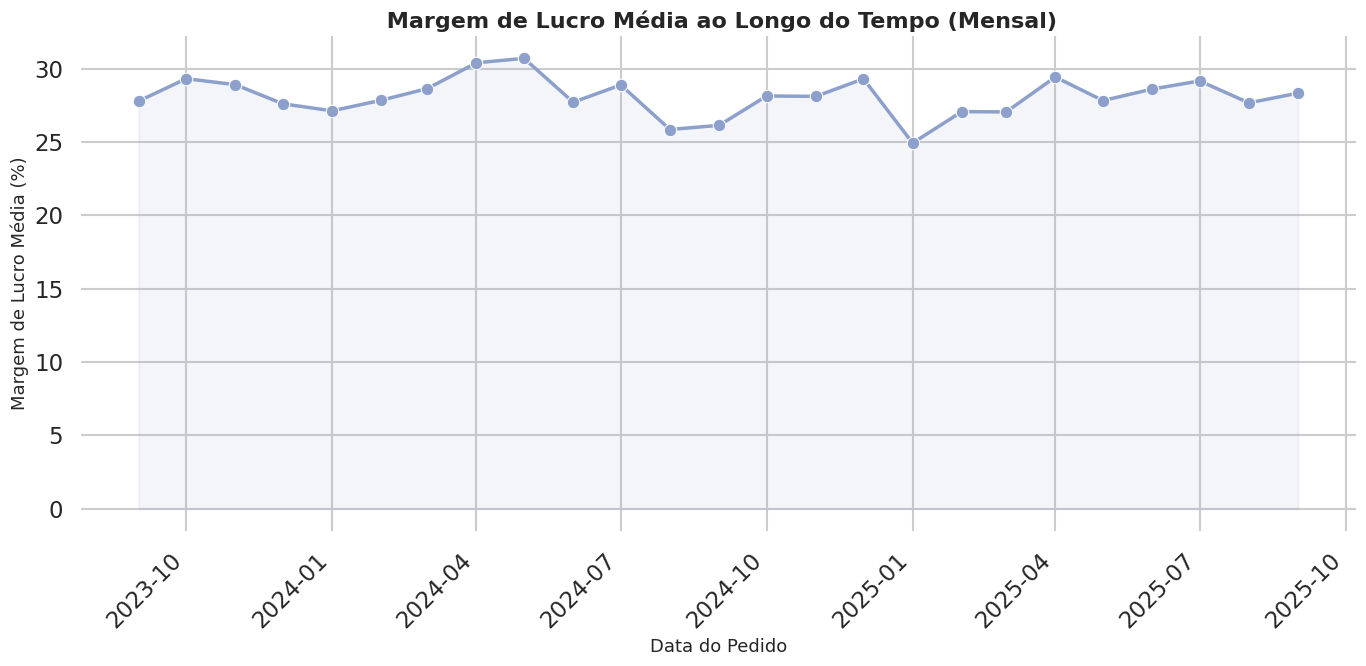

In [15]:
plot_line_smooth(profit_margin_over_time, ' Margem de Lucro Média ao Longo do Tempo (Mensal)', 'Margem de Lucro Média (%)', color_idx=2)

Margem flutua entre ~25–30% com alguns picos; existe uma queda notável em um mês (possível promoções altas).
Interpretação/ação

Cruzar com descontos e campanhas para entender trade-off volume × margem.

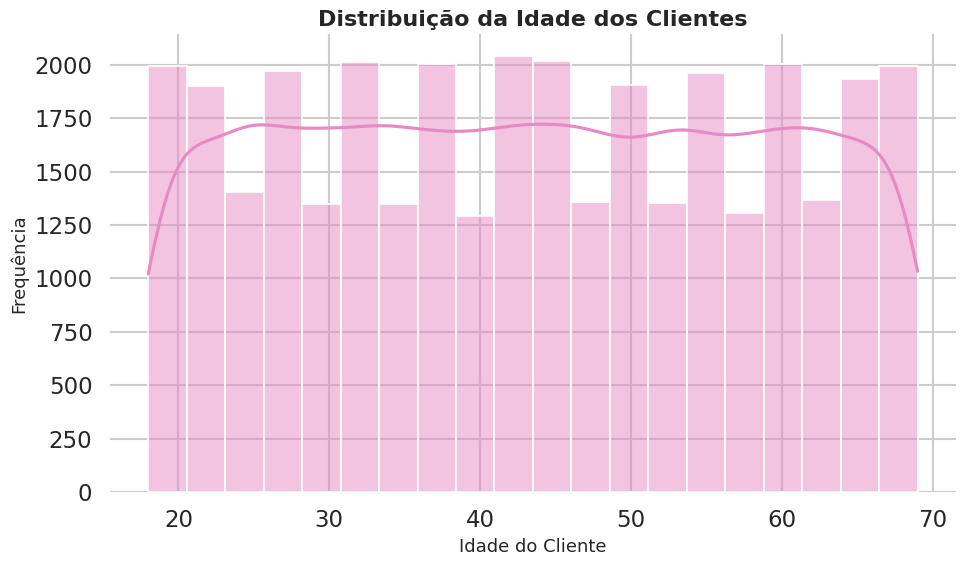

In [16]:
# 7. Distribuição de Idade do Cliente
# Cria um histograma para visualizar a distribuição da idade dos clientes.
plt.figure(figsize=(10,6))
sns.histplot(df['customer_age'], bins=20, kde=True, color=soft_palette[3], edgecolor='white', linewidth=1.2)
plt.title('Distribuição da Idade dos Clientes', fontsize=16, weight='bold')
plt.xlabel('Idade do Cliente', fontsize=13)
plt.ylabel('Frequência', fontsize=13)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Distribuição relativamente ampla, mas com maior densidade em idades adultas (aprox 25–55).

Não há picos extremos — base de clientes é bastante heterogênea.
Interpretação/ação

Segmentação: campanhas personalizadas por faixa etária (ex.: produtos eletrônicos para 25–40; saúde/beleza para 40+ se indicado).

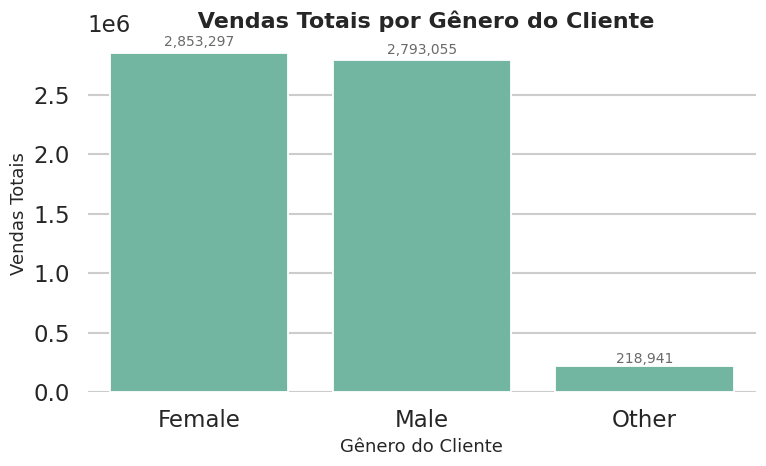

In [17]:
# 8. Vendas por Gênero do Cliente
# Agrupa os dados por gênero do cliente e soma o total de vendas.
sales_by_gender = df.groupby('customer_gender')['total_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
ax = sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, edgecolor='white', linewidth=1.3)
plt.title(' Vendas Totais por Gênero do Cliente', fontsize=16, weight='bold')
plt.xlabel('Gênero do Cliente', fontsize=13)
plt.ylabel('Vendas Totais', fontsize=13)

# Adiciona rótulos de valor no topo de cada barra.
for i, v in enumerate(sales_by_gender.values):
    ax.text(i, v + (v*0.01), f"{v:,.0f}", ha='center', va='bottom', fontsize=10, color='dimgray')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Modelagem Preditiva

Esta seção foca na construção de modelos preditivos para entender e prever o comportamento do cliente.

*   **Segmentação de Clientes (Clustering):** Para identificar perfis de clientes distintos com base em seus comportamentos de compra.

Essa análise e modelo visam fornecer insights acionáveis para estratégias de marketing, vendas e gestão de estoque.

In [18]:
# Seleção de features
# Identificar as features mais relevantes para a segmentação de clientes (por exemplo, frequência de compra, valor gasto, categorias de produtos comprados).

print("Colunas disponíveis no DataFrame:")
print(df.columns)

print('\n')
print('Recursos promissores para segmentação de clientes:')
print("- total_spending (agregado): Representa o valor total que um cliente gasta.")
print("- order_count (agregada): Indica o número de pedidos feitos por um cliente.")
print("- average_order_value (agregado): Mostra o valor médio de cada pedido.")
print("- total_quantity (agregada): Representa o volume total de itens comprados.")
print("- returned_proportion (agregada): Indica a proporção de itens devolvidos por um cliente.")
print("- most_frequent_category (agregada): Revela as preferências e os interesses de um cliente pela categoria mais comprada.")
print("- customer_age e customer_gender: Informações demográficas que podem diferenciar grupos de clientes.")
print("- region e payment_method: Características comportamentais e geográficas.")

Colunas disponíveis no DataFrame:
Index(['order_id', 'customer_id', 'product_id', 'category', 'price',
       'discount', 'quantity', 'payment_method', 'order_date',
       'delivery_time_days', 'region', 'returned', 'total_amount',
       'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender',
       'order_month'],
      dtype='object')


Recursos promissores para segmentação de clientes:
- total_spending (agregado): Representa o valor total que um cliente gasta.
- order_count (agregada): Indica o número de pedidos feitos por um cliente.
- average_order_value (agregado): Mostra o valor médio de cada pedido.
- total_quantity (agregada): Representa o volume total de itens comprados.
- returned_proportion (agregada): Indica a proporção de itens devolvidos por um cliente.
- most_frequent_category (agregada): Revela as preferências e os interesses de um cliente pela categoria mais comprada.
- customer_age e customer_gender: Informações demográficas que podem diferenciar grupo

In [19]:
# Pré-processamento de dados para Clustering
# Esta seção prepara os dados de nível de cliente para o algoritmo de clustering, agregando informações por cliente e codificando variáveis categóricas.

# Agrupar o dataframe original pelo customer_id para criar um dataframe de nível de cliente.
# Calculamos várias métricas agregadas por cliente para entender seu comportamento de compra.
customer_data = df.groupby('customer_id').agg(
    total_spending=('total_amount', 'sum'), # Soma total gasta pelo cliente
    order_count=('order_id', 'count'), # Número total de pedidos
    average_order_value=('total_amount', 'mean'), # Valor médio do pedido
    total_quantity=('quantity', 'sum'), # Quantidade total de itens comprados
    returned_proportion=('returned', lambda x: (x == 'Yes').mean())
).reset_index()

# Adicionar colunas demográficas e de localização (assumindo que não mudam por cliente)
# Agrupamos novamente pelo customer_id para pegar a primeira ocorrência (assumindo que não muda)
customer_info = df.groupby('customer_id').agg(
    customer_age=('customer_age', 'first'), # Pega a primeira idade registrada para o cliente
    customer_gender=('customer_gender', 'first'), # Pega o primeiro gênero registrado
    region=('region', 'first'), # Pega a primeir região registrada
    payment_method=('payment_method', 'first') # Peg o primeiro método de pagamento registrado
).reset_index()

# Juntar as informações demográficas/de localização ao dataframe de dados agregados do cliente
customer_data = pd.merge(customer_data, customer_info, on='customer_id')

# Lidar com a coluna most_frequent_category e outras colunas categóricas (usando one-hot encoding)
# Calcular a categoria mais frequente separadamente devido ao método de agregação
def most_frequent(x):
    if not x.mode().empty:
        return x.mode()[0]
    return None

# Aplica a função most_frequent para encontrar a categoria mais comprada por cada cliente
customer_most_frequent_category = df.groupby('customer_id')['category'].agg(most_frequent).reset_index()
customer_most_frequent_category.rename(columns={'category': 'most_frequent_category'}, inplace=True)
customer_data = pd.merge(customer_data, customer_most_frequent_category, on='customer_id', how='left')

# Lidar com valores ausentes ('Unknown') em most_frequent_category se um cliente não tiver pedidos (fillna com 'Unknown').
customer_data['most_frequent_category'] = customer_data['most_frequent_category'].fillna('Unknown')

# One-hot encode categorical features
# Converte variáveis categóricas em variáveis dummy (numéricas binárias) para que possam ser usadas no clustering.
categorical_features = ['customer_gender', 'region', 'payment_method', 'most_frequent_category']
# Cria novas colunas para cada categoria em cada feature, com valores 0 ou 1.
# drop_first=True evita a multicolinearidade removendo a primeira categoria de cada feature.
customer_data_encoded = pd.get_dummies(customer_data, columns=categorical_features, drop_first=True)

# Selecionar as features numéricas resultantes da agregação e codificação.
# Remove a coluna 'customer_id' pois não é uma feature para clustering.
customer_data_encoded = customer_data_encoded.drop('customer_id', axis=1)

# Identificar colunas numéricas (após codificação one-hot) para padronização.
numerical_features = customer_data_encoded.select_dtypes(include=['float64', 'int64', 'uint8']).columns

# Padronizar as funcionalidades numéricas usando StandardScaler do scikit-learn.
# A padronização (escalonamento) é crucial para algoritmos baseados em distância como o K-Means,
# pois coloca todas as features na mesma escala, evitando que features com valores maiores dominem a distância.
scaler = StandardScaler()
df_clustered_scaled = scaler.fit_transform(customer_data_encoded[numerical_features])

# Converta o array escalonado de volta para um DataFrame para facilitar a visualização e uso posterior.
df_clustered = pd.DataFrame(df_clustered_scaled, columns=numerical_features, index=customer_data.index)

# 6. Armazene o dataframe pré-processado, pronto para o clustering, em uma nova variável (df_clustered).
print("Primeiras 5 linhas do DataFrame pré-processado para clustering (escalonado):")
display(df_clustered.head())
print("\nInformações sobre o DataFrame pré-processado:")
display(df_clustered.info())

Primeiras 5 linhas do DataFrame pré-processado para clustering (escalonado):


,total_spending,order_count,average_order_value,total_quantity,returned_proportion,customer_age
0,-0.642683,-1.154664,-0.340170,-1.233770,-0.441807,0.682741
1,3.027179,0.309759,2.549750,1.503285,-0.441807,-1.307168
2,-0.635103,0.309759,-0.669163,-0.138948,-0.441807,0.483750
3,-0.710726,-0.666523,-0.626321,-0.960065,-0.441807,-0.378543
4,-0.030431,-0.666523,0.370239,-0.412654,-0.441807,-1.439828



Informações sobre o DataFrame pré-processado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7903 entries, 0 to 7902
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_spending       7903 non-null   float64
 1   order_count          7903 non-null   float64
 2   average_order_value  7903 non-null   float64
 3   total_quantity       7903 non-null   float64
 4   returned_proportion  7903 non-null   float64
 5   customer_age         7903 non-null   float64
dtypes: float64(6)
memory usage: 370.6 KB


None

## Escolha do algoritmo de clustering

Selecionar um algoritmo de clustering apropriado ( Algoritmo de agrupamento K-Means ). O K-Means é um algoritmo popular e eficaz para segmentação de clientes, pois busca agrupar dados em um número pré-determinado de clusters, minimizando a variância dentro de cada cluster.

## Determinação do número ideal de clusters

Utilizar métodos como o "método do cotovelo" ou o "coeficiente de silhueta" para encontrar o número ideal de clusters. O método do cotovelo examina a redução na soma dos quadrados dentro dos clusters (WCSS) à medida que o número de clusters aumenta, buscando um ponto onde a taxa de diminuição muda abruptamente (o "cotovelo"). O coeficiente de silhueta mede quão bem cada ponto se encaixa em seu próprio cluster em comparação com outros clusters.

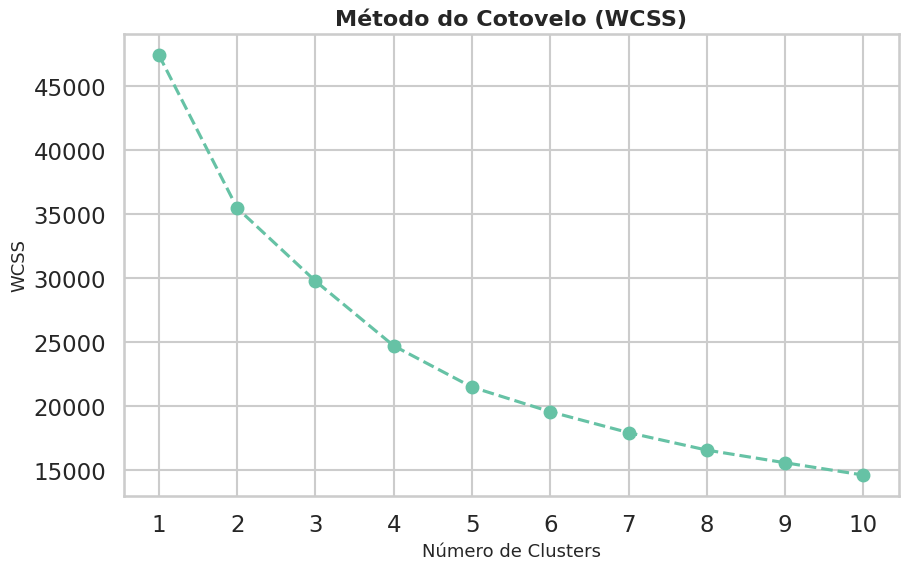

In [20]:
# Determinar o Número Ideal de Clusters Usando o Método do Cotovelo
# O Método do Cotovelo (Elbow Method) nos ajuda a escolher o número ideal de clusters (k)
# calculando a Soma dos Quadrados Dentro dos Clusters (WCSS) para diferentes valores de k.
# A WCSS diminui à medida que k aumenta, e o "cotovelo" no gráfico sugere um bom valor para k
# onde a diminuição da WCSS começa a se estabilizar.

wcss = [] # Lista para armazenar a WCSS para cada número de clusters
for i in range(1, 11):
    # Inicializa o KMeans com o número atual de clusters (i), um estado aleatório para reprodutibilidade
    # e n_init=10 para executar o algoritmo 10 vezes com centroides diferentes e escolher o melhor resultado.
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Added n_init to suppress warning
    # Treina o modelo KMeans com os dados escalonados
    kmeans.fit(df_clustered)
    # Adiciona a WCSS (inertia_) do modelo treinado à lista
    wcss.append(kmeans.inertia_)

# Plota o gráfico do método do cotovelo
plt.figure(figsize=(10, 6)) # Define o tamanho da figura

# Plota a WCSS em função do número de clusters
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (WCSS)', fontsize=16, weight='bold') # Título do gráfico
plt.xlabel('Número de Clusters', fontsize=13) # Rótulo do eixo x
plt.ylabel('WCSS', fontsize=13) # Rótulo do eixo y (Soma dos Quadrados Dentro dos Clusters)
plt.xticks(range(1, 11)) # Define os ticks do eixo x para corresponder ao número de clusters
plt.grid(True) # Adiciona uma grade ao gráfico
plt.show() # Exibe o gráfico

## Aplicação do algoritmo de clustering
Executar o algoritmo de clustering com o número ideal de clusters. Com base no método do cotovelo (gráfico WCSS), o número ideal de clusters parece ser 3, pois a diminuição da WCSS se torna menos acentuada a partir deste ponto. Aplicaremos o algoritmo K-Means com 3 clusters.

In [21]:
# Aplicar o K-Means com o número ideal de clusters (n_clusters=3)
# Instancia o modelo KMeans com 3 clusters, um estado aleatório para reprodutibilidade
# e n_init=10 para garantir um bom resultado.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# Treina o modelo KMeans com os dados de cliente escalonados.
kmeans.fit(df_clustered)

# Adiciona os rótulos de cluster gerados pelo K-Means ao DataFrame original do customer_data.
# Isso associa cada cliente ao seu cluster correspondente.
customer_data['cluster_label'] = kmeans.labels_

# Exibe as primeiras linhas do DataFrame customer_data com a nova coluna 'cluster_label'.
print("Primeiras 5 linhas do DataFrame customer_data com os rótulos de cluster:")
display(customer_data.head())

Primeiras 5 linhas do DataFrame customer_data com os rótulos de cluster:


,customer_id,total_spending,order_count,average_order_value,total_quantity,returned_proportion,customer_age,customer_gender,region,payment_method,most_frequent_category,cluster_label
0,C10000,210.58,2,105.290000,2,0.0,54,Male,North,Debit Card,Electronics,2
1,C10001,3246.02,5,649.204000,12,0.0,24,Female,North,UPI,Electronics,0
2,C10002,216.85,5,43.370000,6,0.0,51,Other,Central,Debit Card,Toys,2
3,C10003,154.30,3,51.433333,3,0.0,38,Male,Central,Debit Card,Home,2
4,C10004,716.99,3,238.996667,5,0.0,22,Female,West,Credit Card,Electronics,2


## Análise e interpretação dos clusters

Analisar as características de cada cluster para identificar perfis de clientes. Esta etapa envolve examinar as médias, medianas e distribuições das features (numéricas e categóricas) para cada cluster para entender o que diferencia um grupo de clientes do outro. Isso nos permite dar nomes significativos aos clusters e descrever o comportamento típico dos clientes em cada segmento.

In [22]:
# Análise e Interpretação dos Clusters
# Agrupar os dados do cliente pelo rótulo do cluster e calcular estatísticas descritivas
# para as features numéricas para caracterizar cada cluster.
cluster_numerical_summary = customer_data.groupby('cluster_label').agg({
    'total_spending': ['mean', 'median', 'std'], # Média, mediana e desvio padrão do gasto total
    'order_count': ['mean', 'median', 'std'], # Média, mediana e desvio padrão da contagem de pedidos
    'average_order_value': ['mean', 'median', 'std'], # Média, mediana e desvio padrão do valor médio do pedido
    'total_quantity': ['mean', 'median', 'std'], # Média, mediana e desvio padrão da quantidade total
    'returned_proportion': ['mean', 'median', 'std'], # Média, mediana e desvio padrão da proporção retornada
    'customer_age': ['mean', 'median', 'std'] # Média, mediana e desvio padrão da idade do cliente
})

print("Estatísticas para recursos numéricos por cluster:")
display(cluster_numerical_summary)
print('\n')

# Analisar a distribuição de características categóricas para cada cluster
# Mostra a proporção de cada categoria (gênero, região, etc.) dentro de cada cluster.
categorical_features_for_analysis = ['customer_gender', 'region', 'payment_method', 'most_frequent_category']

print("Distribuição de frequência para características categóricas por cluster:")
for feature in categorical_features_for_analysis:
    print(f"\n{feature.replace('_', ' ').capitalize()}:") # Formata o nome da feature para impressão
    # Calcula a contagem de valores para cada categoria dentro de cada cluster e normaliza para obter proporções.
    # unstack(fill_value=0) reorganiza a tabela para facilitar a comparação entre clusters.
    cluster_categorical_distribution = customer_data.groupby('cluster_label')[feature].value_counts(normalize=True).unstack(fill_value=0)
    display(cluster_categorical_distribution)

# Com base nas estatísticas e distribuições, descreva o perfil de cada cluster.
# Esta etapa é interpretativa e será realizada na seção de raciocínio após a execução do código.
# Interpretação Exemplo (a ser escrita como texto no notebook):
# - Cluster 0: Clientes de Alto Valor/Frequência. Tendem a gastar mais (alto total_spending), fazer mais pedidos (alto order_count), ter um alto valor médio de pedido e comprar maior quantidade. Frequentemente compram eletrônicos.
# - Cluster 1: Clientes de Média Frequência/Valor. Gastam e pedem menos que o cluster 0, mas mais que o cluster 2. Têm uma mistura de categorias compradas, mas com maior proporção de Beleza, Eletrônicos e Moda.
# - Cluster 2: Clientes de Baixa Frequência/Valor. Gastam menos, fazem menos pedidos e compram menor quantidade. Têm um valor médio de pedido similar ao cluster 1. Tendem a comprar mais Beleza, Eletrônicos e Moda, mas também uma proporção notável de Casa e Brinquedos.

Estatísticas para recursos numéricos por cluster:


total_spending                        order_count         \
                        mean    median          std        mean median   
cluster_label                                                            
0                2774.509880  2523.345  1319.219525    4.799658    5.0   
1                 934.934284   840.710   529.983362    6.335692    6.0   
2                 356.616220   270.755   303.400128    3.069012    3.0   

                        average_order_value                          \
                    std                mean      median         std   
cluster_label                                                         
0              2.080523          648.486769  536.728333  334.488891   
1              1.467799          150.744851  133.723333   83.558918   
2              1.148184          118.703061   86.612500  103.834346   

              total_quantity                  returned_proportion         \
                        mean median       std                mean median   
cluster_label                                                              
0                   8.686644    8.0  3.966769            0.066845    0.0   
1                   9.815352    9.0  2.830029            0.055648    0.0   
2                   4.142698    4.0  1.818993            0.052853    0.0   

                        customer_age                    
                    std         mean median        std  
cluster_label                                           
0              0.129678    43.345890   43.0  15.280462  
1              0.091121    43.435090   43.0  15.069230  
2              0.140458    43.924978   44.0  15.054992



Distribuição de frequência para características categóricas por cluster:

Customer gender:


customer_gender,Female,Male,Other
cluster_label,,,
0,0.465753,0.501712,0.032534
1,0.488857,0.472586,0.038557
2,0.489314,0.470837,0.039849



Region:


region,Central,East,North,South,West
cluster_label,,,,,
0,0.166096,0.231164,0.207192,0.214041,0.181507
1,0.161655,0.187478,0.220375,0.220375,0.210117
2,0.168299,0.203028,0.212823,0.217498,0.198353



Payment method:


payment_method,COD,Credit Card,Debit Card,PayPal,UPI,Wallet
cluster_label,,,,,,
0,0.150685,0.364726,0.212329,0.089041,0.138699,0.044521
1,0.123806,0.335338,0.255041,0.099752,0.121330,0.064733
2,0.117988,0.346839,0.256679,0.098175,0.115539,0.064782



Most frequent category:


most_frequent_category,Beauty,Electronics,Fashion,Grocery,Home,Sports,Toys
cluster_label,,,,,,,
0,0.104452,0.691781,0.061644,0.017123,0.078767,0.030822,0.015411
1,0.185002,0.240891,0.210824,0.083834,0.145030,0.065794,0.068624
2,0.244880,0.234417,0.211264,0.093054,0.100178,0.061888,0.054319


## Visualização dos clusters

Visualizar os clusters para entender a separação e as características de cada grupo.

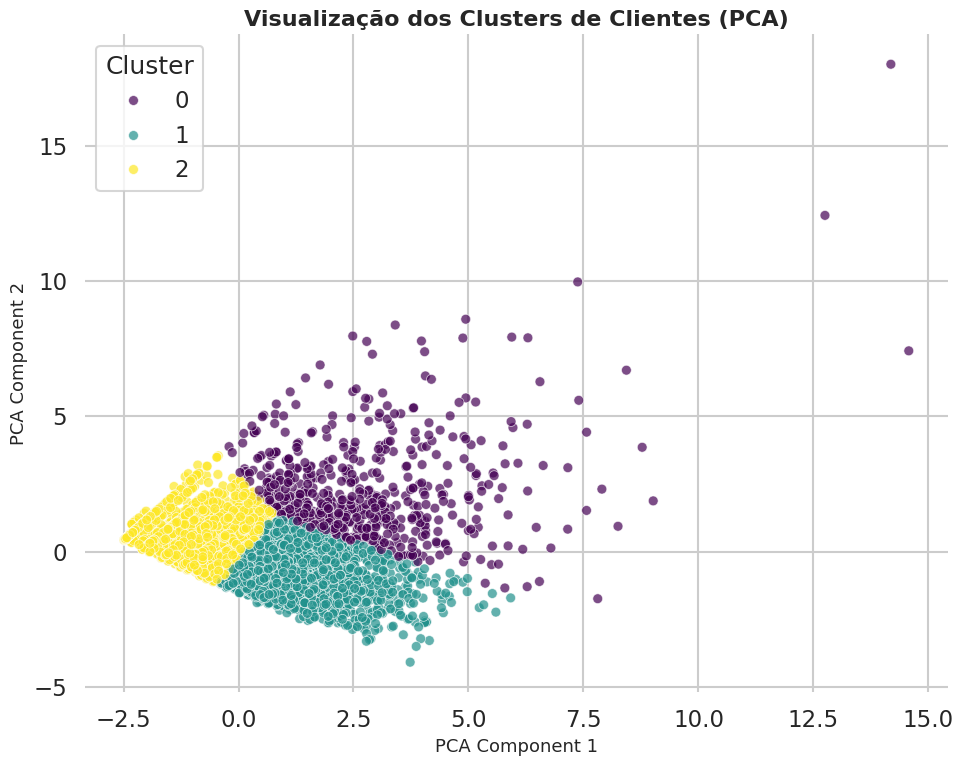

In [23]:
# Visualização dos Clusters
# Assumindo que 3 clusters foram determinados como ótimos
n_clusters = 3

# Use o PCA para reduzir dimensões para visualização se houver mais de 2 recursos numéricos
# Verifique o número de recursos numéricos no dataframe pré-processado para clustering.
# df_clustered foi criado e escalonado anteriormente.
if df_clustered.shape[1] > 2:
    pca = PCA(n_components=2) # Inicializa o PCA para reduzir para 2 componentes principais.
    df_pca = pca.fit_transform(df_clustered) # Aplica o PCA aos dados escalonados.
    # Cria um novo DataFrame com os componentes PCA e o índice do dataframe original.
    df_clustered_visual = pd.DataFrame(df_pca, columns=['PCA Component 1', 'PCA Component 2'], index=df_clustered.index)
    x_label = 'PCA Component 1' # Define o rótulo para o eixo x.
    y_label = 'PCA Component 2' # Define o rótulo para o eixo y.
else:
    # Se já houver 2 ou menos features numéricas, usa as originais para visualização.
    # (Embora improvável com as features selecionadas para clustering).
    df_clustered_visual = df_clustered.copy()
    x_label = df_clustered_visual.columns[0]
    y_label = df_clustered_visual.columns[1]


# Adicionar rótulos de cluster ao dataframe de visualização
# Pega os rótulos de cluster do dataframe customer_data (que já tem os rótulos adicionados)
df_clustered_visual['cluster_label'] = customer_data['cluster_label']

# Crie o gráfico de dispersão para visualizar os clusters.
plt.figure(figsize=(10, 8)) # Define o tamanho da figura.
# Cria o gráfico de dispersão, mapeando componentes PCA (ou features originais) para x e y,
# e usando os rótulos de cluster para colorir os pontos (hue).
sns.scatterplot(x=x_label, y=y_label, hue='cluster_label', data=df_clustered_visual, palette='viridis', s=50, alpha=0.7)
plt.title('Visualização dos Clusters de Clientes (PCA)', fontsize=16, weight='bold') # Define o título do gráfico.
plt.xlabel(x_label, fontsize=13) # Define o rótulo do eixo x.
plt.ylabel(y_label, fontsize=13) # Define o rótulo do eixo y.
plt.legend(title='Cluster') # Adiciona a legenda para os clusters.
sns.despine(left=True, bottom=True) # Remove as bordas desnecessárias do gráfico.
plt.tight_layout() # Ajusta o layout para evitar sobreposição.
plt.show() # Exibe o gráfico.

## Visualização dos clusters

Visualizar os clusters para entender a separação e as características de cada grupo. A Redução de Dimensionalidade usando PCA (Principal Component Analysis) é aplicada se houver mais de 2 features numéricas para que os clusters possam ser visualizados em um gráfico de dispersão 2D.

A visualização dos clusters, mesmo após a redução de dimensionalidade com PCA, pode não mostrar uma separação perfeitamente clara. Isso é comum em dados reais e pode indicar que os clusters se sobrepõem em algumas dimensões ou que as features selecionadas não capturam completamente as diferenças entre os grupos. No entanto, a análise das características de cada cluster (feita na célula de código anterior) fornece insights mais detalhados sobre os perfis de clientes em cada segmento.

- Cluster 0: Clientes de Alto Valor/Frequência. Tendem a gastar mais (alto total_spending), fazer mais pedidos (alto order_count), ter um alto valor médio de pedido e comprar maior quantidade. Frequentemente compram eletrônicos.
- Cluster 1: Clientes de Média Frequência/Valor. Gastam e pedem menos que o cluster 0, mas mais que o cluster 2. Têm uma mistura de categorias compradas, mas com maior proporção de Beleza, Eletrônicos e Moda.
- Cluster 2: Clientes de Baixa Frequência/Valor. Gastam menos, fazem menos pedidos e compram menor quantidade. Têm um valor médio de pedido similar ao cluster 1. Tendem a comprar mais Beleza, Eletrônicos e Moda, mas também uma proporção notável de Casa e Brinquedos.

# Conclusão

A análise exploratória de dados revelou insights importantes sobre o comportamento de compra dos clientes, o desempenho das categorias de produtos e as tendências de vendas ao longo do tempo. A segmentação de clientes utilizando K-Means identificou 3 clusters distintos com base em métricas de compra e características demográficas/geográficas. A análise detalhada desses clusters permite a criação de estratégias de marketing e vendas direcionadas para cada segmento.

Embora a visualização dos clusters em 2D possa mostrar alguma sobreposição, as características médias e as distribuições das features dentro de cada cluster fornecem perfis claros:

*   **Cluster 0 (Alto Valor/Frequência):** Clientes que gastam mais, fazem mais pedidos e compram maior quantidade, com forte preferência por Eletrônicos.
*   **Cluster 1 (Média Frequência/Valor):** Clientes com comportamento de compra intermediário, com maior proporção de compras em Beleza, Eletrônicos e Moda.
*   **Cluster 2 (Baixa Frequência/Valor):** Clientes que gastam menos, fazem menos pedidos e compram menor quantidade, com uma mistura de categorias compradas.

Futuramente, a modelagem preditiva (previsão de devolução de produtos) pode ser aprofundada para entender e mitigar o comportamento de devolução, complementando a segmentação de clientes para otimizar ainda mais as operações de e-commerce.